In [1]:
TFile* TT = new TFile("../TT_TuneCUETP8M2T4_13TeV-powheg-pythia8TTSep16MuMu.root");
TFile* MuMu = new TFile("../MuMu.root");
TFile* histogram = new TFile("histograms.root");

In [2]:
TH2F* TruthReco =(TH2F*) TT->Get("Whelicity/h_truthRecoMuMu");
TH1F* GenCosMuMu =(TH1F*) TT->Get("Whelicity/h_cosMuMu");
TH1F* DataCosMuMu =(TH1F*) MuMu->Get("Whelicity/h_cosMuMu");
GenCosMuMu->Scale((3590 * 831.8)/77081176);
TH2F* M = new TH2F("M","",22,-1.1,1.1,22,-1.1,1.1);   

In [3]:
// TruthReco->GetXaxis()->SetRangeUser(-1.,1.);
// TruthReco->GetYaxis()->SetRangeUser(-1.,1.);
TruthReco->Draw("colz");
// DataCosMuMu->Draw("hist");
// TruthReco->Rebin2D(4/3,4/3);
// for(int binx=68;binx<=334;++binx)
// {
//     for(int biny=67;biny <=334; ++biny){
//         M->SetBinContent(binx-67,biny-67,TruthReco->GetBinContent(binx,biny));
//     }
// }
// cout << TruthReco->GetNbinsY();

// M->Draw("colz");

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


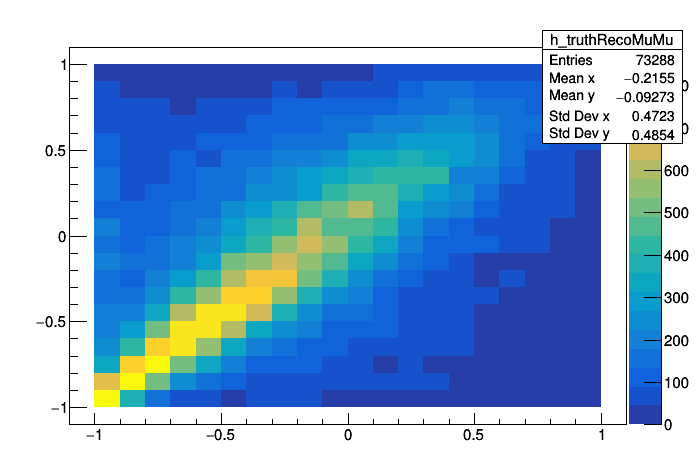

In [4]:
c1->Draw();

In [5]:
TUnfold unfold(TruthReco,
TUnfold::kHistMapOutputVert,
TUnfold::kRegModeSize,
TUnfold::kEConstraintNone);

Info in <TUnfold::SetConstraint>: fConstraint=0
Warning in <TUnfold::TUnfold>: 4 output bins do not depend on the input data  0-1 22-23
Info in <TUnfold::TUnfold>: 22 input bins and 20 output bins
Info in <TUnfold::TUnfold>: 4 regularisation conditions have been skipped


In [6]:
TH1F* hist_data_result = new TH1F("hist_data_result","",22,-1.1,1.1);
TH2F* hist_data_rho = new TH2F("hist_data_rho","",22,-1.1,1.1,22,-1.1,1.1);
double tau = 0.0;

In [7]:
unfold.SetInput(GenCosMuMu); // observed data 1D histogram
 tau = 0.05;
unfold.DoUnfold(tau); // run the unfolding
unfold.GetOutput(hist_data_result); // get histogram with unfolded data
unfold.GetRhoIJ(hist_data_rho); // get 2D histogram of correlation coeff

Warning in <TUnfold::SetInput>: 2/22 input bins have zero error, and are ignored.
Warning in <TUnfold::GetInputInverseEmatrix>: number of parameters 20 = input rank 20. Problem is ill posed


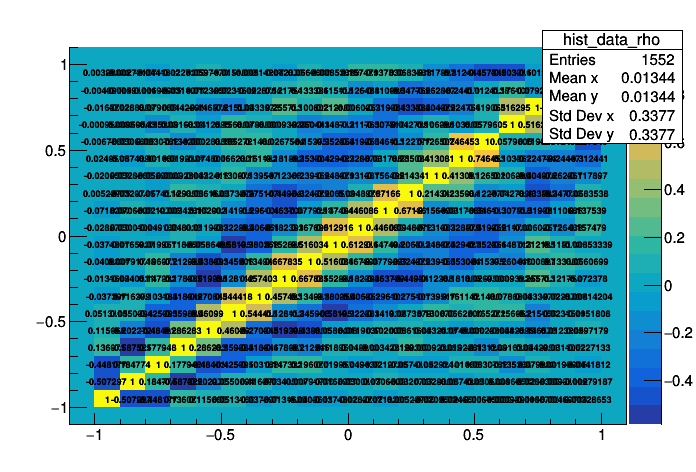

In [8]:
hist_data_rho->Draw("text colz");
c1->Draw();

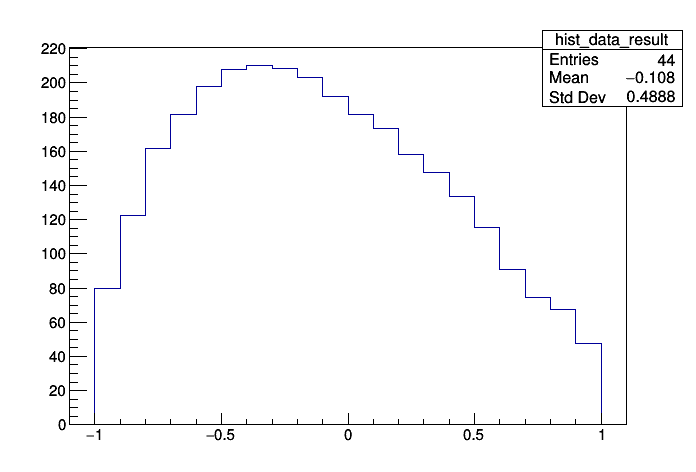

In [9]:
hist_data_result->Draw("hist");
c1->Draw();

In [10]:
unfold.SetInput(DataCosMuMu); // observed data 1D histogram
 tau = 0.009;
unfold.DoUnfold(tau); // run the unfolding
unfold.GetOutput(hist_data_result); // get histogram with unfolded data
unfold.GetRhoIJ(hist_data_rho); // get 2D histogram of correlation coeff

Warning in <TUnfold::SetInput>: 2/22 input bins have zero error, and are ignored.
Warning in <TUnfold::GetInputInverseEmatrix>: number of parameters 20 = input rank 20. Problem is ill posed


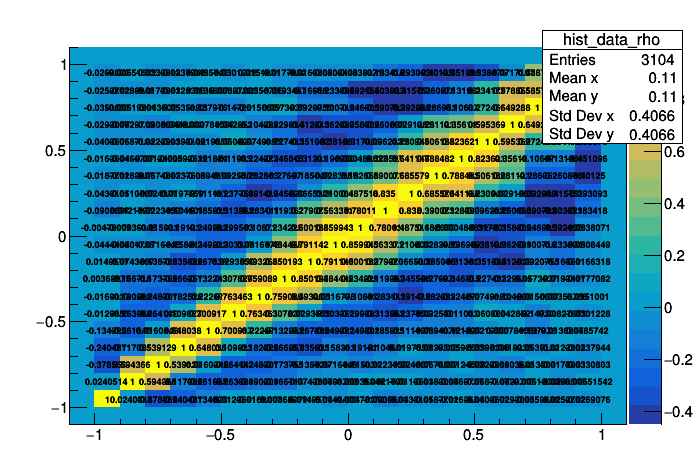

In [11]:
hist_data_rho->Draw("text colz");
c1->Draw();

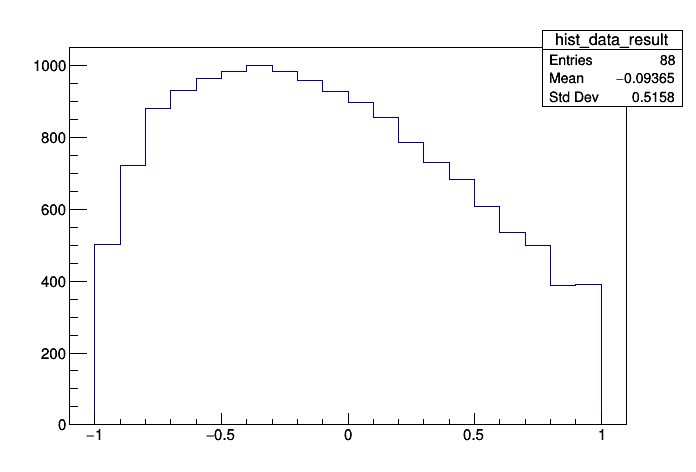

In [12]:
hist_data_result->Draw("hist");
c1->Draw();

In [13]:
TF1 *fit = new TF1("fitfunc","[0]*(3./8)*(1-x)^2+(1-[0]-[1])*(3./8)*(1+x)^2+(3./4)*(1-x^2)*[1]",-1,1);
TF1* WCos = new TF1("WCos","[2]*([0]*(3./8)*(1-x)^2+(1-[0]-[1])*(3./8)*(1+x)^2+(3./4)*(1-x^2)*([1]))/(0.3110*(3./8)*(1-x)^2+(1-0.3110-0.6870)*(3./8)*(1+x)^2+(3./4)*(1-x^2)*(0.6870))",-1,1);

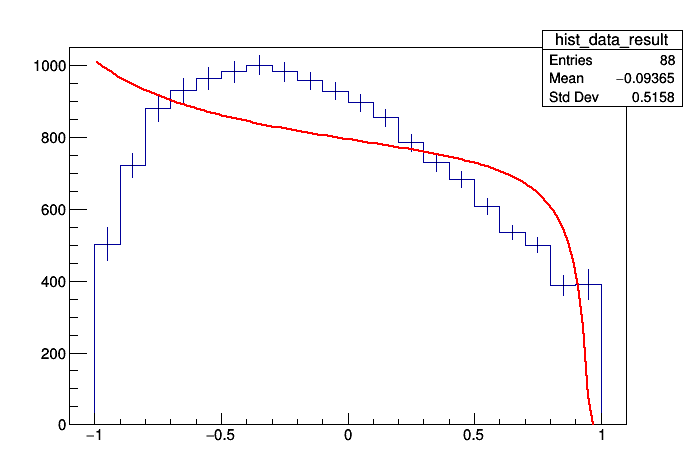

 FCN=601.587 FROM MIGRAD    STATUS=CONVERGED     292 CALLS         293 TOTAL
                     EDM=1.01716e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.86777e-01   8.21080e-03   9.73617e-06   8.33387e-03
   2  p1           6.42820e-01   9.21494e-03  -7.22512e-06   7.81598e-03
   3  p2           8.16033e+02   6.65281e+00   8.36057e-03   1.84777e-06


In [14]:
hist_data_result->Draw("same");
hist_data_result->Fit(WCos,"R");
c1->Draw();

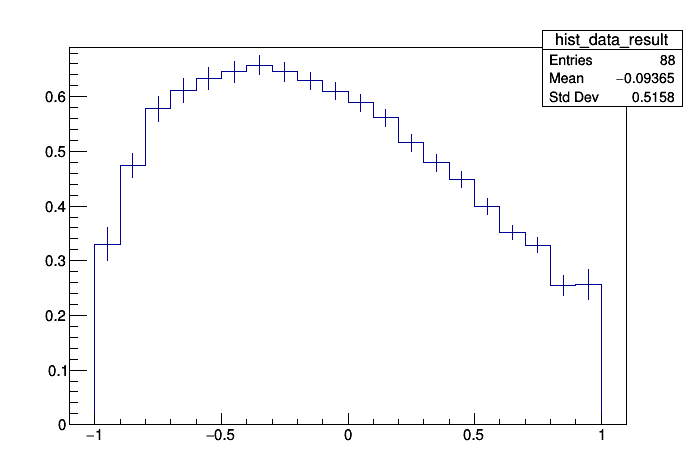

In [15]:
hist_data_result->Scale(1/hist_data_result->Integral("width"));
c1->Draw();

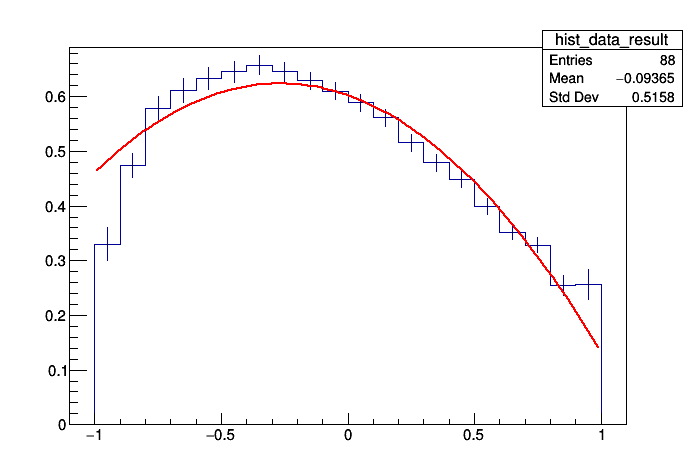

 FCN=69.1658 FROM MIGRAD    STATUS=CONVERGED      35 CALLS          36 TOTAL
                     EDM=6.41652e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.06560e-01   8.56656e-03   1.98834e-05  -3.57355e-09
   2  p1           6.04905e-01   1.29984e-02   3.01698e-05   4.71029e-10


In [16]:
hist_data_result->Draw("same");
hist_data_result->Fit(fit,"R");
c1->Draw();

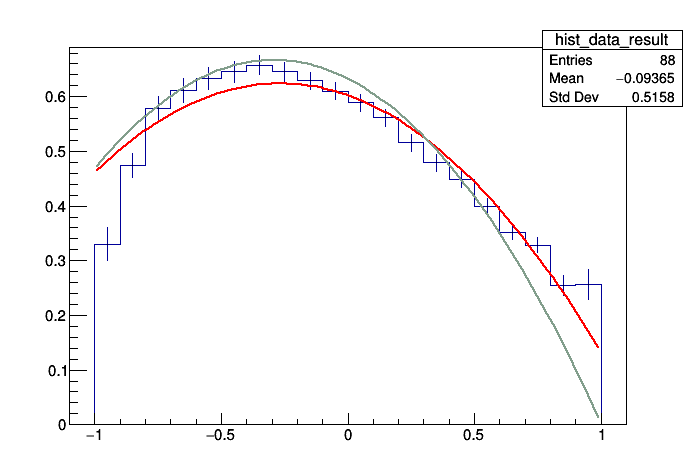

In [17]:
fit->SetParameters(.3110,.6870);
fit->SetLineColor(32);
fit->Draw("same");
c1->Draw();

In [18]:
double NST =3819, NDY=20405.7, NDIBOSON=1228.6, NWJets=88.7,NTTV=106.4; 
double NBKG = NST + NDY + NDIBOSON + NWJets + NTTV;

In [19]:
double NTT = 72449.1;
double NMC = NSIG + NBKG;

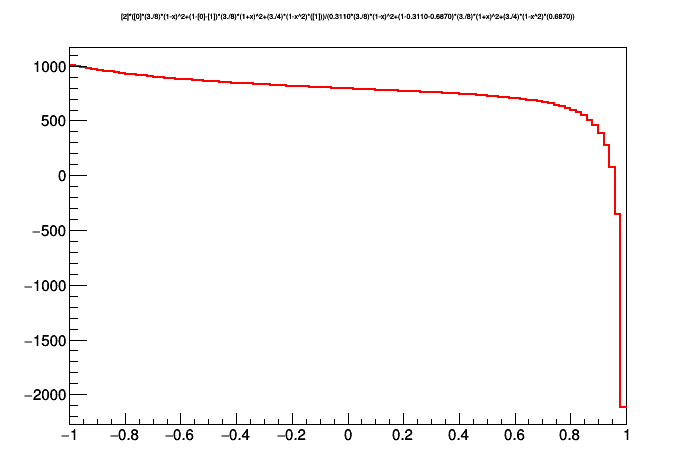

In [20]:
WCos->Draw("hist");
c1->Draw();

In [21]:
cout << WCos->Eval(0.8) << endl;

607.638
